In [2]:
import glob 
import cv2 
import torch 
import random 
import numpy as np 
import matplotlib.pyplot as plt 

from models.vae import VAE


# Plot Examples

Lets plot some reconstructed images from our VAE to check if it works.

In [7]:
model_checkpoint = "/home/mojo/dev/world-models-pytorch/exps/VAE/2023-07-23_bs_512_epochs_50_latentsize_64/weights/best.pth"

In [8]:
data_dir = "/home/mojo/dev/world-models-pytorch/"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [9]:
model = VAE(latent_size=64, in_channels=3)
model = model.to(device)

In [10]:
model.load_state_dict(torch.load(model_checkpoint))
model.eval()

VAE(
  (encoder): Encoder(
    (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2))
    (conv2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (conv3): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
    (conv4): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2))
    (fc_mu): Linear(in_features=1024, out_features=64, bias=True)
    (fc_log_sigma): Linear(in_features=1024, out_features=64, bias=True)
  )
  (decoder): Decoder(
    (fc): Linear(in_features=64, out_features=1024, bias=True)
    (deconv1): ConvTranspose2d(1024, 128, kernel_size=(5, 5), stride=(2, 2))
    (deconv2): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2))
    (deconv3): ConvTranspose2d(64, 32, kernel_size=(6, 6), stride=(2, 2))
    (deconv4): ConvTranspose2d(32, 3, kernel_size=(6, 6), stride=(2, 2))
  )
)

In [11]:
files = glob.glob(data_dir + "/**/*.npz", recursive=True)
len(files)

10020

In [12]:
samples = random.sample(files, 10)

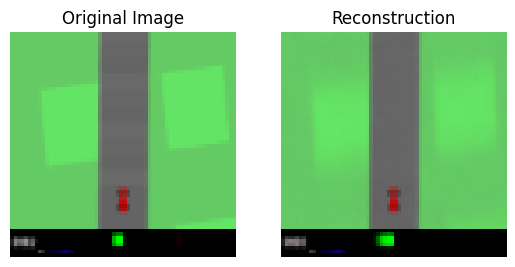

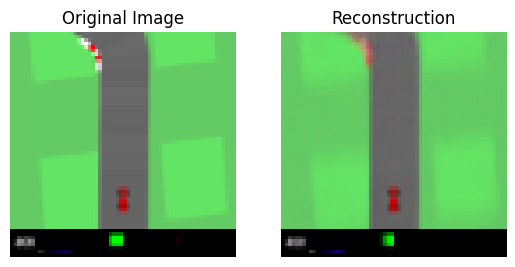

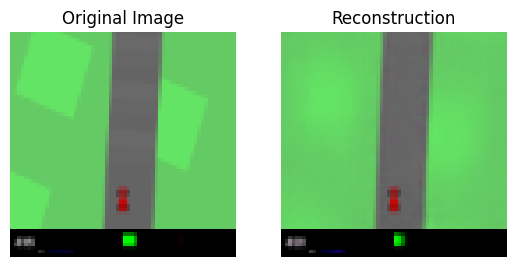

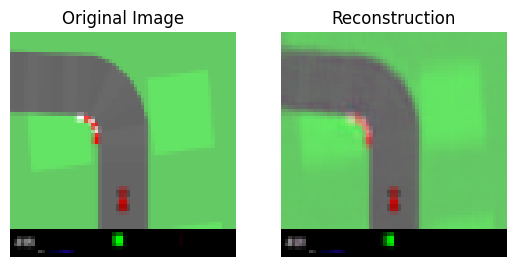

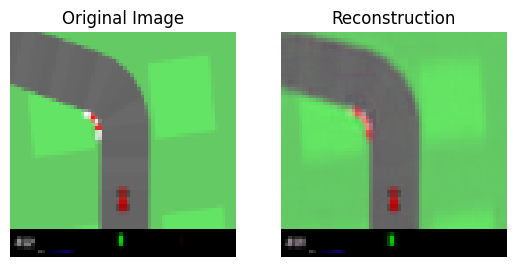

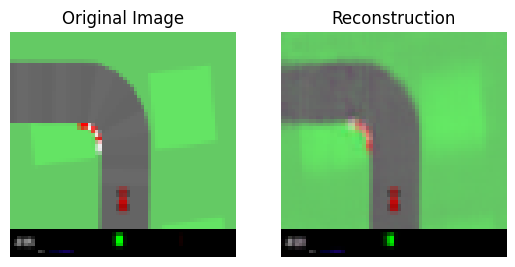

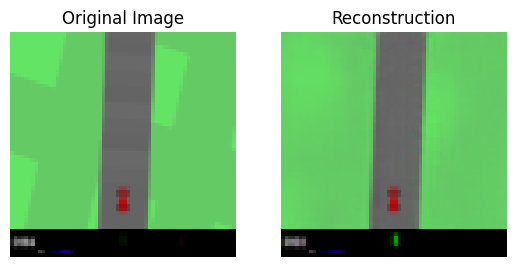

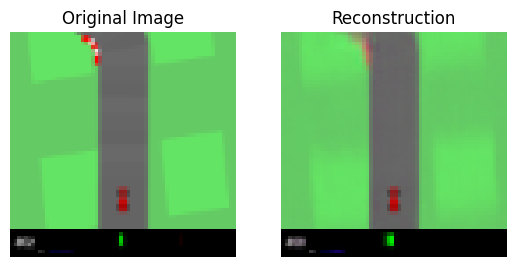

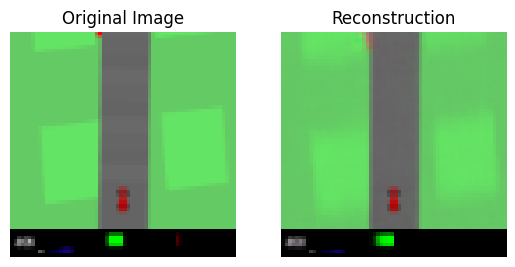

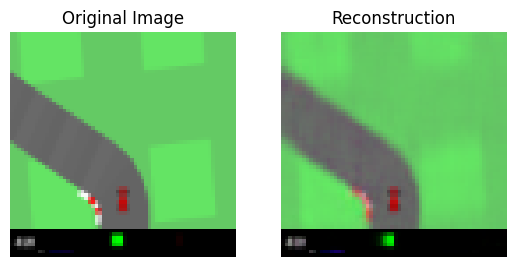

In [13]:
for sample in samples:
    with np.load(sample) as data_sample: 
        data = {k: np.copy(v) for k, v in data_sample.items()} 
    idx = random.randint(0, 999) 
    img = data['observations'][idx]
    img = cv2.resize(img, (64, 64))
    img_org = img.copy()
    img = torch.tensor(img).float() / 255. 
    img = img.unsqueeze(0)
    img = img.transpose(1, 3)
    img = img.to(device)
    
    with torch.no_grad():
        pred = model(img)

    reconst = pred[0].transpose(1,3).squeeze(0).cpu().numpy()
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(img_org)
    axs[0].set_title("Original Image")
    axs[0].axis("off")
    axs[1].imshow(reconst)
    axs[1].set_title("Reconstruction")
    axs[1].axis("off")
    plt.show()